## Task 2
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
column_names=['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
for i in range(0,len(column_names)):
    negative_values = (df[column_names[i]] < 0).sum()
    print(f"Negative Values of {column_names[i]}:")
    print(negative_values)

Negative Values of PassengerId:
0
Negative Values of Survived:
0
Negative Values of Pclass:
0
Negative Values of Age:
0
Negative Values of SibSp:
0
Negative Values of Parch:
0
Negative Values of Fare:
0


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
imputer = SimpleImputer(strategy='mean')
age_reshaped=df['Age'].values.reshape(-1, 1)
df['Age']=imputer.fit_transform(age_reshaped)

In [13]:
df['Age'].isnull().sum()

0

In [14]:
column_names=['Cabin','Embarked']
for col_name in column_names:
    df[col_name] = df[col_name].fillna(df[col_name].mode()[0])


In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
df_encoded = pd.get_dummies(df)

In [17]:
corr_matrix = df_encoded.corr()

In [18]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.052129,0.039227,-0.021633,...,-0.009220,-0.049263,-0.030733,4.313663e-02,-0.008206,-0.060049,-0.013814,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.026456,-0.026456,0.042470,...,-0.037436,0.033803,0.073642,-2.645647e-02,0.060095,0.016040,-0.026456,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.027734,0.027734,0.027734,...,0.039243,-0.021469,-0.021469,2.773375e-02,-0.017519,0.055561,-0.052496,-0.243292,0.221009,0.074053
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.031730,-0.035337,0.013674,...,-0.028102,-0.070966,-0.003127,3.585838e-17,-0.099278,-0.077253,0.039469,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.015907,0.014507,0.014507,...,-0.022508,0.007576,-0.027582,-1.590679e-02,0.063564,-0.001402,-0.015907,-0.059528,-0.026354,0.068734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_G6,-0.060049,0.016040,0.055561,-0.077253,-0.001402,0.072388,-0.025180,-0.002251,-0.002251,-0.002251,...,-0.003185,-0.003903,-0.003903,-2.250988e-03,-0.003185,1.000000,-0.002251,-0.032371,-0.020654,0.041356
Cabin_T,-0.013814,-0.026456,-0.052496,0.039469,-0.015907,-0.015878,0.002224,-0.001124,-0.001124,-0.001124,...,-0.001590,-0.001948,-0.001948,-1.123596e-03,-0.001590,-0.002251,1.000000,-0.016158,-0.010310,0.020643
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.016158,-0.016158,-0.016158,...,-0.022864,-0.028018,-0.028018,-1.615811e-02,-0.022864,-0.032371,-0.016158,1.000000,-0.148258,-0.782742
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.010310,-0.010310,-0.010310,...,-0.014588,-0.017877,-0.017877,1.089863e-01,-0.014588,-0.020654,-0.010310,-0.148258,1.000000,-0.499421


In [19]:
columns_to_drop=['Name','Sex','Cabin','Embarked','Ticket']
new_df = df.drop(columns=columns_to_drop)


In [20]:
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


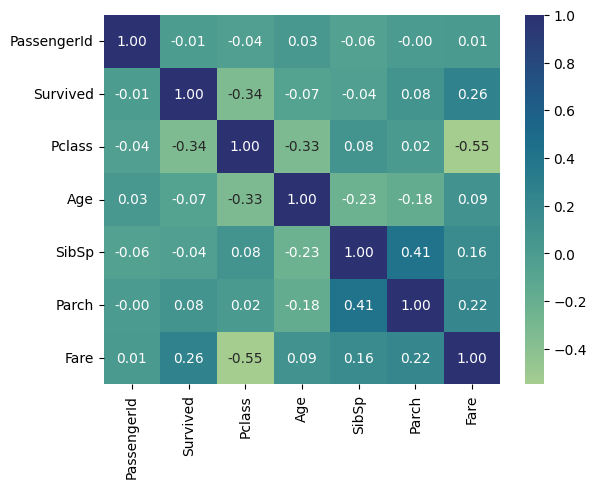

In [21]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),cmap="crest",annot=True, fmt=".2f")
plt.show()

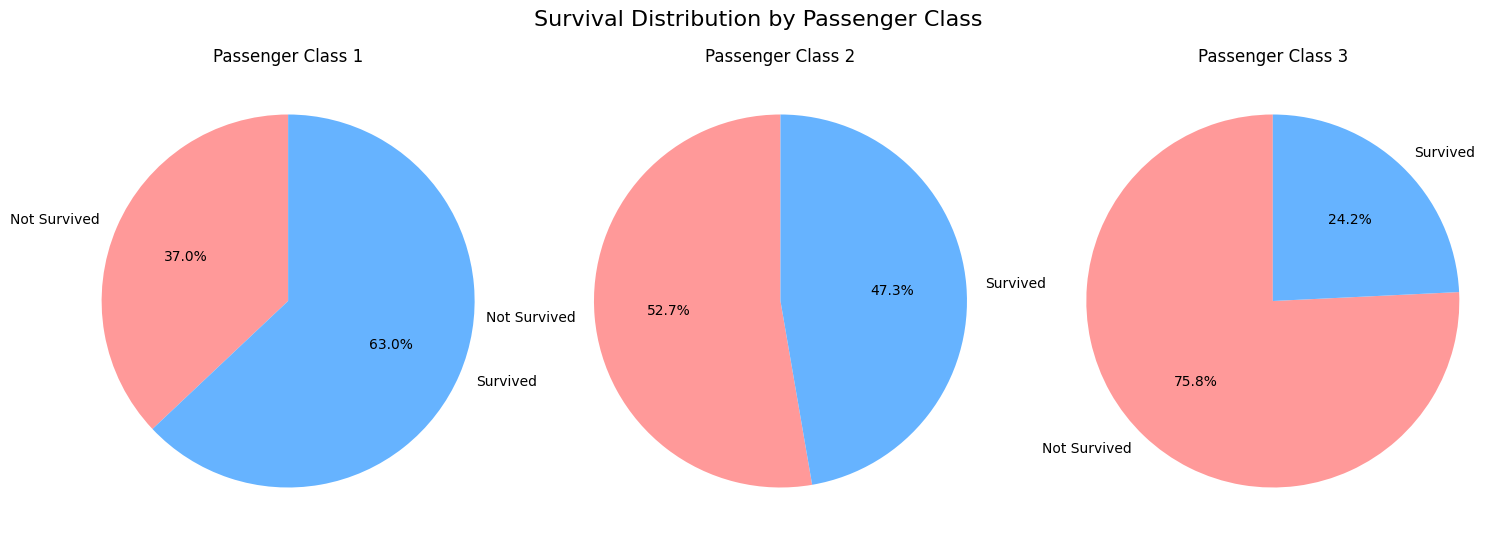

In [22]:
pclass_survived_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting a pie chart for each passenger class
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Survival Distribution by Passenger Class', fontsize=16)

for i, pclass in enumerate(pclass_survived_counts.index):
    ax = axs[i]
    ax.pie(pclass_survived_counts.loc[pclass], labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    ax.set_title(f'Passenger Class {pclass}')
    ax.axis('equal')

plt.show()


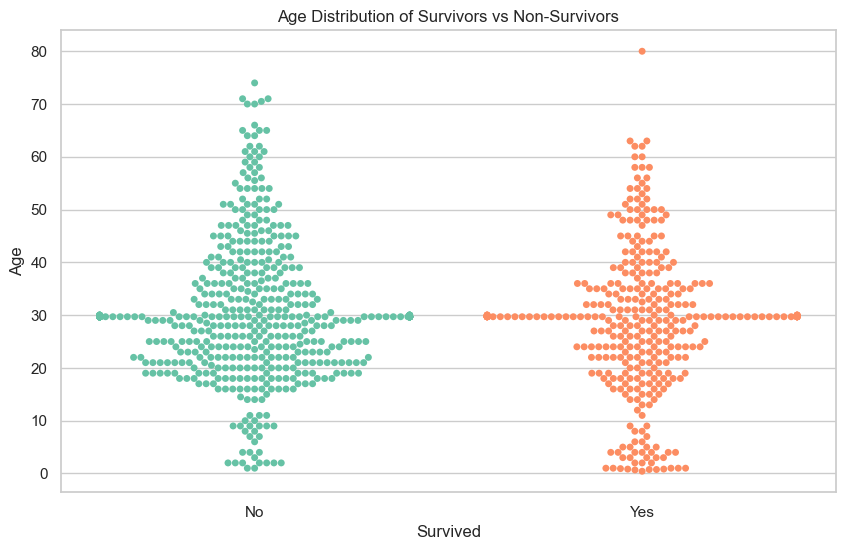

In [23]:
sns.set(style="whitegrid")

# Create a swarm plot to visualize the distribution of ages among survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.swarmplot(x="Survived", y="Age", data=df, palette="Set2")
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

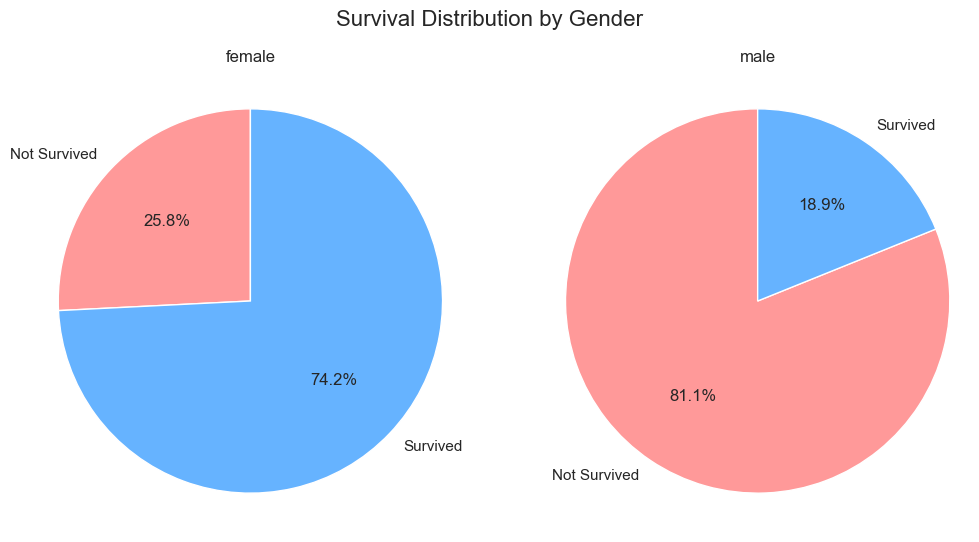

In [24]:
sex_survived_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotting a pie chart for each gender
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Survival Distribution by Gender', fontsize=16)

for i, sex in enumerate(sex_survived_counts.index):
    ax = axs[i]
    ax.pie(sex_survived_counts.loc[sex], labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
    ax.set_title(sex)
    ax.axis('equal')

plt.show()

In [25]:
column_drops=['Name','Ticket','Survived']
X=df.drop(column_drops,axis=1)


In [26]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.000000,1,0,7.2500,B96 B98,S
1,2,1,female,38.000000,1,0,71.2833,C85,C
2,3,3,female,26.000000,0,0,7.9250,B96 B98,S
3,4,1,female,35.000000,1,0,53.1000,C123,S
4,5,3,male,35.000000,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,B96 B98,S
887,888,1,female,19.000000,0,0,30.0000,B42,S
888,889,3,female,29.699118,1,2,23.4500,B96 B98,S
889,890,1,male,26.000000,0,0,30.0000,C148,C


In [27]:
encode_columns=['Sex','Cabin','Embarked']
for i in range(0,len(encode_columns)):
    lb=preprocessing.LabelEncoder()
    X[encode_columns[i]]=lb.fit_transform(X[encode_columns[i]])

In [28]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.000000,1,0,7.2500,47,2
1,2,1,0,38.000000,1,0,71.2833,81,0
2,3,3,0,26.000000,0,0,7.9250,47,2
3,4,1,0,35.000000,1,0,53.1000,55,2
4,5,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,47,2
887,888,1,0,19.000000,0,0,30.0000,30,2
888,889,3,0,29.699118,1,2,23.4500,47,2
889,890,1,1,26.000000,0,0,30.0000,60,0


In [29]:
y=pd.DataFrame(data=df['Survived'])

In [30]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42)

In [32]:
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [33]:
y_pred=lg.predict(X_test)
y_pred.shape

(223,)

In [34]:
acc = accuracy_score(Y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 78.9237668161435
